#Milticlass classification

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
# The data is already been split
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_data[0].shape

(28, 28)

Text(0.5, 1.0, 'Pullover')

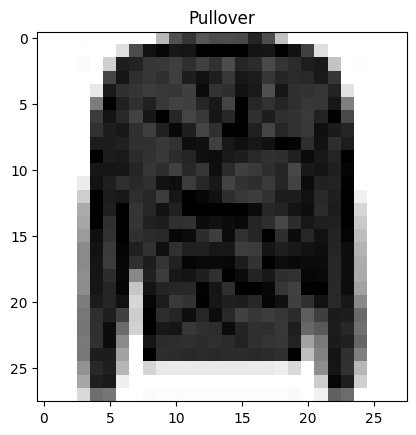

In [6]:
index = 27
plt.imshow(train_data[index], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index]])

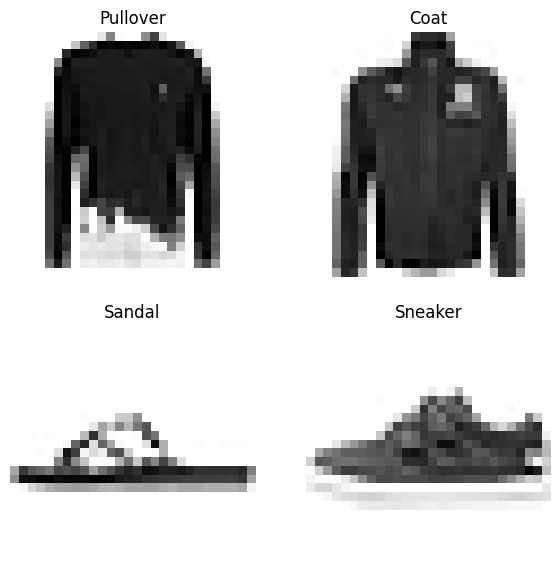

In [7]:
#plot multiple random images

plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

# Building a multiclass classification model

In [8]:
input_shape = train_data[0].shape
output_shape = train_labels.max() + 1

In [38]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=input_shape))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer='Adam',
              metrics=['accuracy'])

non_normal_history = model.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2218 - accuracy: 0.2314 - val_loss: 1.7193 - val_accuracy: 0.3892
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4513 - accuracy: 0.4497 - val_loss: 1.2327 - val_accuracy: 0.5301
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0285 - accuracy: 0.6375 - val_loss: 0.9082 - val_accuracy: 0.6563
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8166 - accuracy: 0.6990 - val_loss: 0.8761 - val_accuracy: 0.6746
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7480 - accuracy: 0.7186 - val_loss: 0.7423 - val_accuracy: 0.7370
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7072 - accuracy: 0.7349 - val_loss: 0.7794 - val_accuracy: 0.7092
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6845 - accuracy: 0.7478 - val_loss: 0.8719 - val_accuracy:

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 32)                25120     
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 10)                170       
                                                                 
Total params: 25818 (100.85 KB)
Trainable params: 25818 (100.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
train_data.min(), train_data.max()

(0, 255)

Neural networks preffere data to be scaled

In [9]:
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

In [45]:
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [47]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Flatten(input_shape=input_shape))
model_2.add(tf.keras.layers.Dense(32, activation='relu'))
model_2.add(tf.keras.layers.Dense(16, activation='relu'))
model_2.add(tf.keras.layers.Dense(10, activation='softmax'))


model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer='Adam',
              metrics=['accuracy'])

normal_history = model_2.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5655 - accuracy: 0.8045 - val_loss: 0.4760 - val_accuracy: 0.8317
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4123 - accuracy: 0.8542 - val_loss: 0.4601 - val_accuracy: 0.8394
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3810 - accuracy: 0.8649 - val_loss: 0.4400 - val_accuracy: 0.8373
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3569 - accuracy: 0.8723 - val_loss: 0.4145 - val_accuracy: 0.8514
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3413 - accuracy: 0.8769 - val_loss: 0.3906 - val_accuracy: 0.8594
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3283 - accuracy: 0.8803 - val_loss: 0.4198 - val_accuracy: 0.8441
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3209 - accuracy: 0.8836 - val_loss: 0.3892 - val_accuracy:

<Axes: title={'center': 'Normalized data'}>

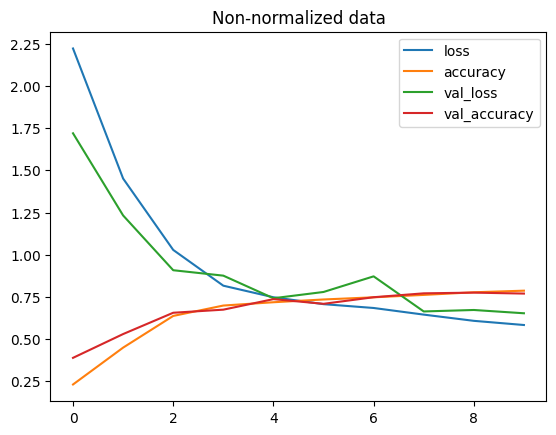

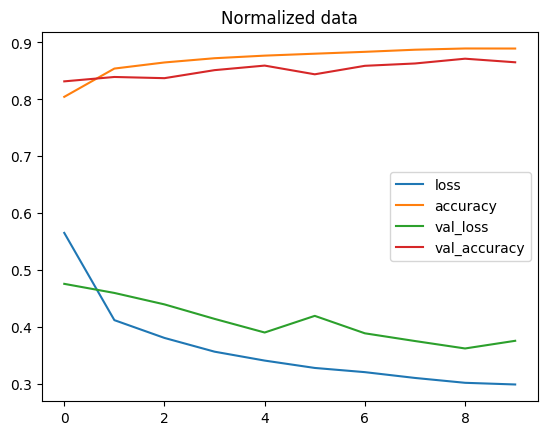

In [51]:
pd.DataFrame(non_normal_history.history).plot(title='Non-normalized data')
pd.DataFrame(normal_history.history).plot(title='Normalized data')

In [11]:
## Finding ideal learning rate

tf.random.set_seed(42)

model_3 = tf.keras.Sequential()
model_3.add(tf.keras.layers.Flatten(input_shape=input_shape))
model_3.add(tf.keras.layers.Dense(32, activation='relu'))
model_3.add(tf.keras.layers.Dense(16, activation='relu'))
model_3.add(tf.keras.layers.Dense(10, activation='softmax'))

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')

lr_callback = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-3 * 10**(epochs/20))

history_3 = model_3.fit(train_data_norm,
                             train_labels,
                             epochs=40,
                             validation_data=(test_data_norm, test_labels),
                             callbacks=[lr_callback])

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5726 - accuracy: 0.8026 - val_loss: 0.4563 - val_accuracy: 0.8409 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4205 - accuracy: 0.8512 - val_loss: 0.4681 - val_accuracy: 0.8358 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3889 - accuracy: 0.8602 - val_loss: 0.4489 - val_accuracy: 0.8348 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3700 - accuracy: 0.8679 - val_loss: 0.4286 - val_accuracy: 0.8502 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3570 - accuracy: 0.8700 - val_loss: 0.4050 - val_accuracy: 0.8573 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3460 - accuracy: 0.8747 - val_loss: 0.4251 - val_accuracy: 0.8505 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

<Axes: >

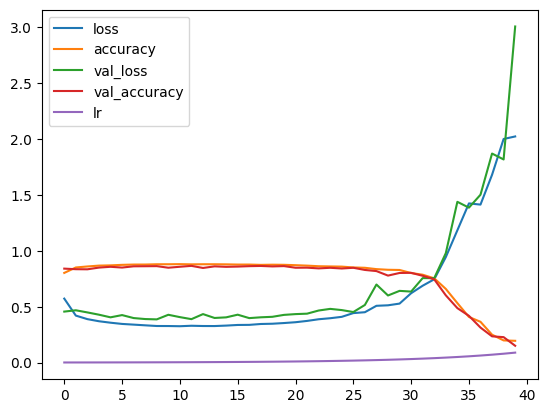

In [13]:
pd.DataFrame(history_3.history).plot()

Text(0.5, 1.0, 'Finding ideal learning rate')

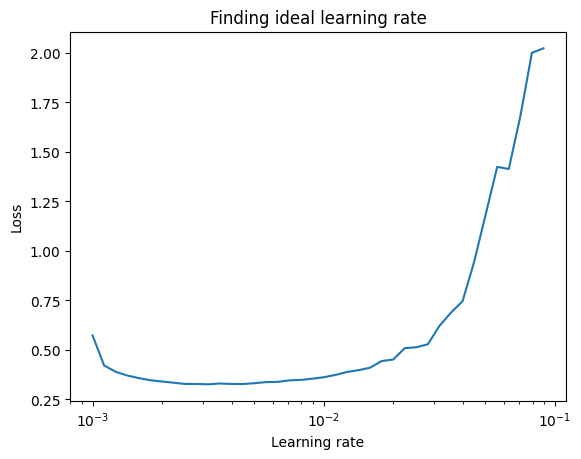

In [17]:
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, history_3.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Finding ideal learning rate')

## Lets refit the model with the ideal learning rate (0.0014)

In [19]:
## Finding ideal learning rate

tf.random.set_seed(42)

model_4 = tf.keras.Sequential()
model_4.add(tf.keras.layers.Flatten(input_shape=input_shape))
model_4.add(tf.keras.layers.Dense(32, activation='relu'))
model_4.add(tf.keras.layers.Dense(16, activation='relu'))
model_4.add(tf.keras.layers.Dense(10, activation='softmax'))

model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(0.0014),
                metrics='accuracy')

history_4 = model_4.fit(train_data_norm,
                             train_labels,
                             epochs=20,
                             validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5580 - accuracy: 0.7976 - val_loss: 0.4601 - val_accuracy: 0.8324
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3999 - accuracy: 0.8558 - val_loss: 0.4335 - val_accuracy: 0.8485
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3687 - accuracy: 0.8629 - val_loss: 0.4343 - val_accuracy: 0.8403
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3490 - accuracy: 0.8722 - val_loss: 0.4072 - val_accuracy: 0.8538
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3369 - accuracy: 0.8758 - val_loss: 0.4193 - val_accuracy: 0.8484
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3256 - accuracy: 0.8787 - val_loss: 0.3995 - val_accuracy: 0.8558
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3174 - accuracy: 0.8836 - val_loss: 0.3999 - val_accuracy:

In [28]:
import itertools
from sklearn.metrics import confusion_matrix

figsize = (10,10)

def make_confusion_matrix(y_test,y_pred, classes=None,figsize = (20,20)):

  cm = confusion_matrix(y_test,y_pred.round())
  cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title = 'Confusion Matrix',
        xlabel = 'Predicted Label',
        ylabel = 'True Label',
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)

  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  ax.yaxis.label.set_size(20)
  ax.xaxis.label.set_size(20)
  ax.title.set_size(20)

  threshold = (cm.max() + cm.min()) / 2

  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment='center',
            color='white' if cm[i,j] > threshold else 'black',
            size=15)

In [37]:
# remember to make predictions on same kind of data, in this case, normalized
pred_labels = model_4.predict(test_data_norm)

313/313 [==============================] - 0s 1ms/step


In [38]:
pred_labels = np.argmax(pred_labels,axis=1)

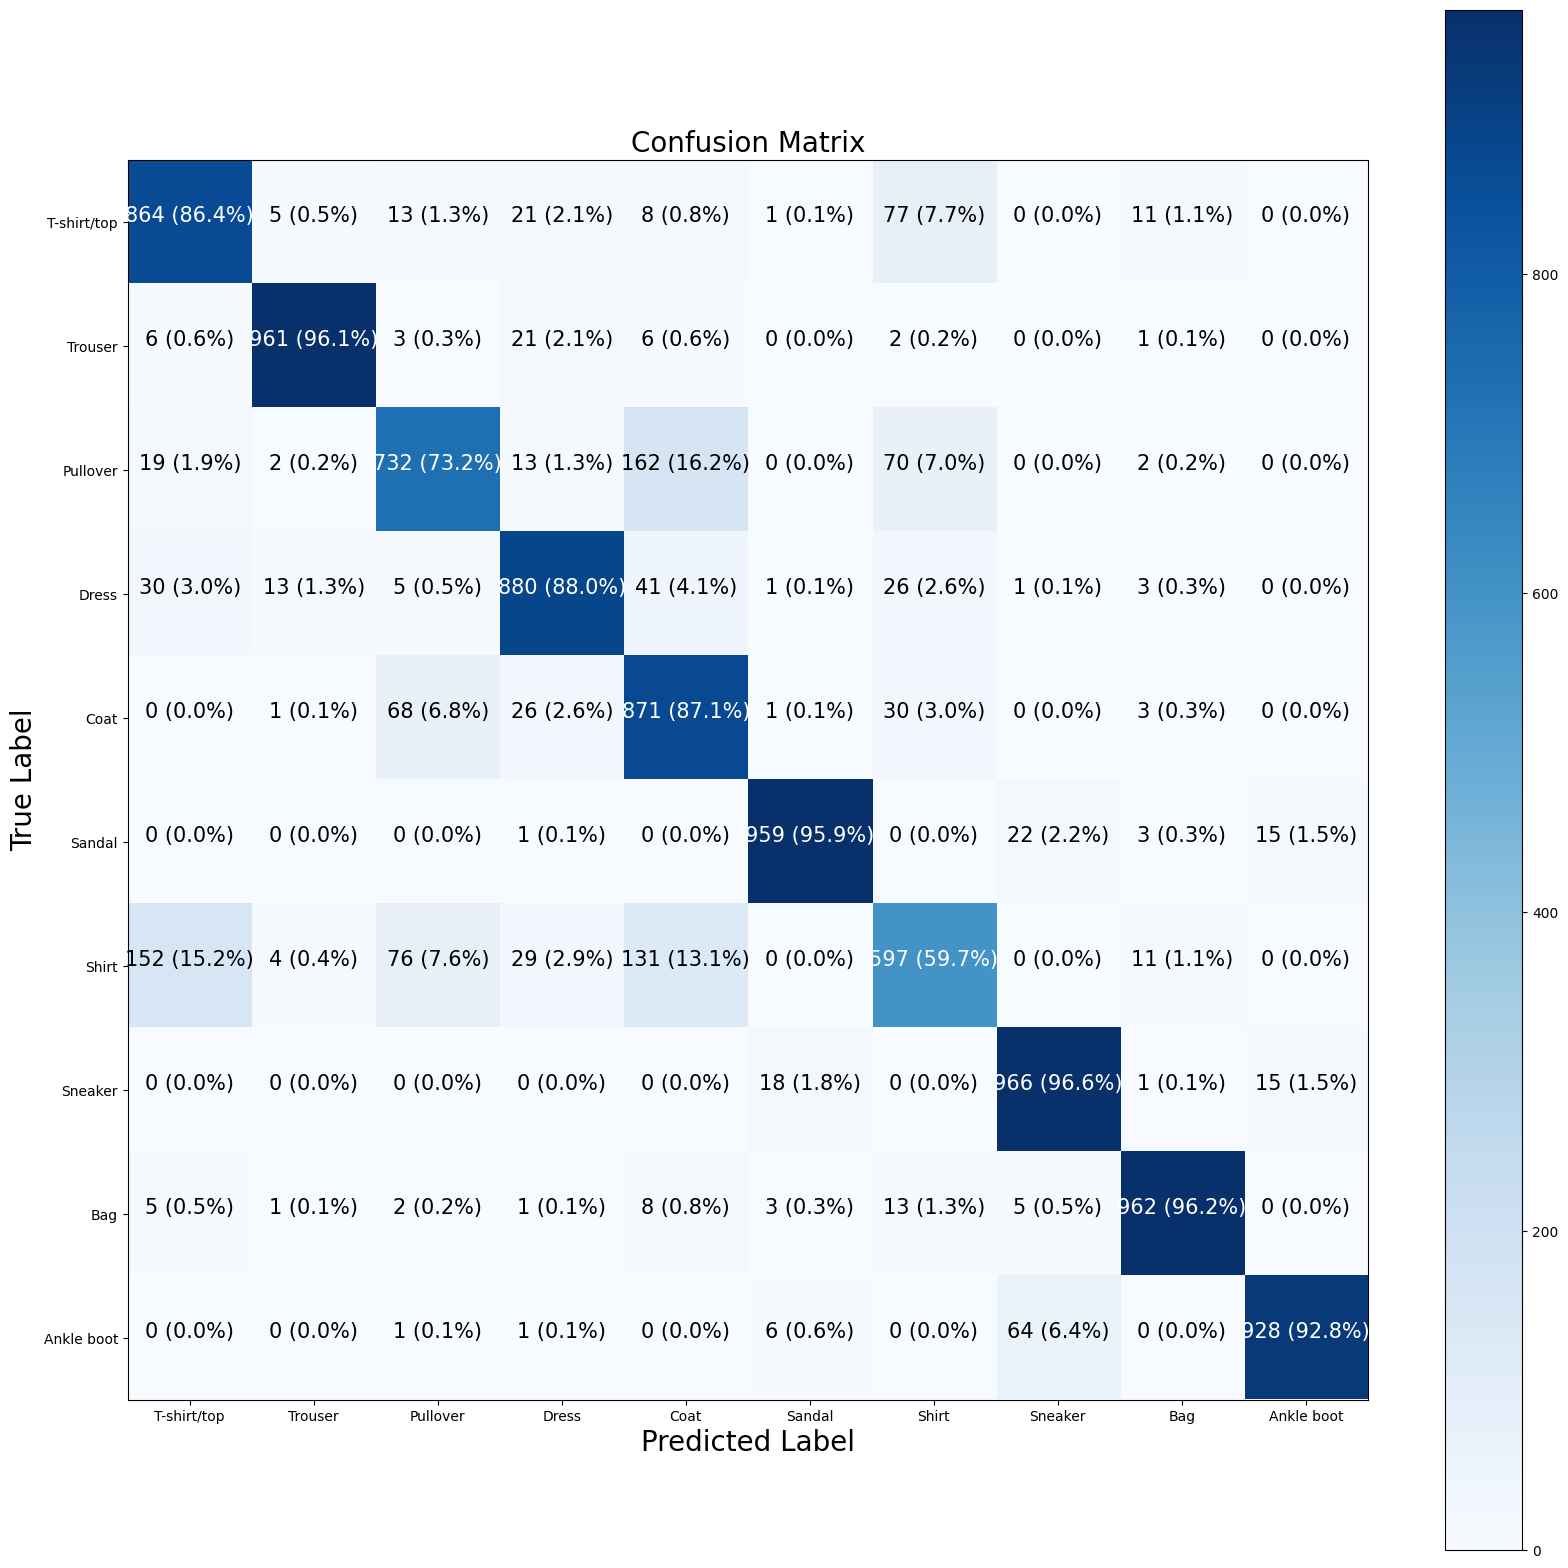

In [39]:
make_confusion_matrix(test_labels,pred_labels,class_names)

In [44]:
accuracy = np.sum(test_labels == pred_labels)/len(test_labels)
accuracy

0.872

In [62]:
import random

def plot_random_image(model, images, true_labels, classes):
  i = random.randint(0, len(images))

  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)

  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'


  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
              color=color)

1/1 [==============================] - 0s 17ms/step


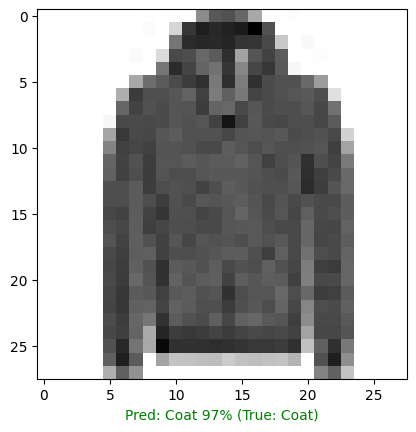

In [81]:
plot_random_image(model_4,test_data_norm,test_labels,class_names)

# What patterns is our model learning

In [82]:
model_4.layers

In [86]:
weights, biases = model_4.layers[1].get_weights()

In [87]:
weights, weights.shape

(array([[ 0.5726758 , -0.14464079,  0.20104735, ...,  0.00962123,
         -0.17344762, -0.10863392],
        [ 0.8931701 , -0.61031634, -0.1935995 , ..., -0.04696319,
         -1.018806  ,  0.5136784 ],
        [ 0.06147813, -0.81282294, -0.0212942 , ...,  0.01886362,
          0.5497352 , -0.9100784 ],
        ...,
        [-0.2920656 ,  0.14617343,  0.7204283 , ...,  0.00446238,
         -1.2523842 , -0.52189016],
        [ 0.7286245 , -0.03720263,  0.12388634, ...,  0.01379609,
         -1.8412256 ,  0.12409545],
        [ 0.52292085,  0.02474249,  0.86976206, ..., -0.04761257,
         -0.8407577 , -0.15279113]], dtype=float32),
 (784, 32))

In [88]:
biases, biases.shape

(array([-0.38942638,  0.33567607,  1.353683  ,  1.1250198 ,  0.40372983,
         0.90101755,  1.1122929 ,  0.2464364 ,  0.8516641 ,  0.85351205,
         0.4787361 ,  0.24967058, -0.24049583, -1.2358896 ,  0.22657648,
         0.47470564,  0.60561556, -0.05883485,  0.10955887,  0.52867794,
         0.8325148 , -0.02665072,  0.03623457, -0.02379302,  0.57232195,
         0.26670343, -0.03952304, -0.5088444 , -0.64209527, -0.02318462,
         0.65428257,  0.12529884], dtype=float32),
 (32,))